# Assignment 6: Viola&Jones
Read the paper by Viola and Jones. You can find it in "mycampus/resources/papers".

## Ex. 5.1 Rectangular Features
Implement the construction of all 2-rect features (horizontal and vertical) within a given window (like the 24x24 px window from the paper). How many exist? **(RESULT)** Display three of these overlaid onto an image of a face. **(RESULT)**

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import skimage

dog = skimage.io.imread('images/dog.jpg')
face = skimage.io.imread('datasets/tinyface/Training_Set/246/246_8.jpg')

# Feature design

We are going to represent features as tuples with the following properties

* y position in subwindow
* x position in subwindow
* height of feature
* width of feature
* horizontal/vertical - `True` denotes vertical
* 2/3 region feature - `True` denotes 3 region

### Scaling

The authors proposed scaling the classifiers, thereby the features, instead of scaling the images to handle faces of various sizes, as this approach is computationally more efficient.
Therefore, our features can assume a 24x24 subwindow and the classifiers should then handle evaluating these properly on larger/smaller windows.

In [2]:
def get_features(include_3rect=True):
    # subwindow size
    s = 24
    # min feature width/height
    m = 6
    features = []
    
    for h in range(m, s):
        for w in range(m, s):
            for y in range(s - h):
                for x in range(s - w):
                    ########################
                    # Create 2-rect features
                    ########################
                    
                    # vertical 2-rect feature
                    if h % 2 == 0:
                        features.append((y, x, h, w, True,  False))
                    # horizontal 2-rect feature
                    if w % 2 == 0:
                        features.append((y, x, h, w, False, False))
                        
                    ########################
                    # Create 3-rect features
                    ########################
                        
                    if not include_3rect:
                        continue
                        
                    # vertical 3-rect feature
                    if h % 3 == 0:
                        features.append((y, x, h, w, True, True))
                    # horizontal 3-rect feature
                    if w % 3 == 0:
                        features.append((y, x, h, w, False, True))
                        
    return features
                        
features = get_features()
features_2rect = get_features(include_3rect=False)

## Amount of features (RESULT)

The paper is not too precise about feature creation. We decided a feature is at least 6 pixels high/wide (one of above), both as very small features are unlikely to generalize well and to deal with performance issues to have a very quick training procedure for the purpose of this demo

In [3]:
print(f'#2-rect   Features: {len(features_2rect)} \n#2,3-rect Features: {len(features)}')

#2-rect   Features: 30780 
#2,3-rect Features: 52326


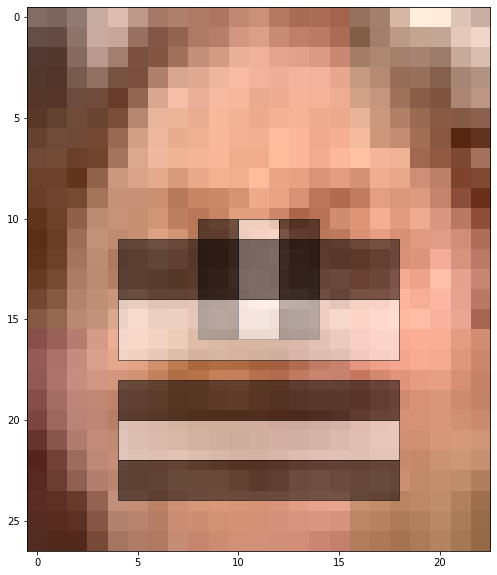

In [4]:
def show_features(img, features):
    fig,ax = plt.subplots(1, figsize=(15,10))
    ax.imshow(img)
        
    for y, x, h, w, vertical, rect3 in features:
        b2 = None
        if vertical:
            if rect3:
                c = w / 3
                b1 = patches.Rectangle((x, y), c, h, linewidth=1,edgecolor='black',facecolor='black', alpha=.5)
                wt = patches.Rectangle((x + c, y), c, h, linewidth=1,edgecolor='black',facecolor='white', alpha=.5)
                b2 = patches.Rectangle((x + 2*c, y), c, h, linewidth=1,edgecolor='black',facecolor='black', alpha=.5)
            else:
                mid = w / 2
                b1 = patches.Rectangle((x, y), mid, h, linewidth=1,edgecolor='black',facecolor='black', alpha=.5)
                wt = patches.Rectangle((x + mid, y), mid, h, linewidth=1,edgecolor='black',facecolor='white', alpha=.5)
        else:
            if rect3:
                c = h / 3
                b1 = patches.Rectangle((x, y), w, c, linewidth=1,edgecolor='black',facecolor='black', alpha=.5)
                wt = patches.Rectangle((x, y + c), w, c, linewidth=1,edgecolor='black',facecolor='white', alpha=.5)
                b2 = patches.Rectangle((x, y + 2*c), w, c, linewidth=1,edgecolor='black',facecolor='black', alpha=.5)
            else:
                mid = h / 2
                b1 = patches.Rectangle((x, y), w, mid, linewidth=1,edgecolor='black',facecolor='black', alpha=.5)
                wt = patches.Rectangle((x, y + mid), w, mid, linewidth=1,edgecolor='black',facecolor='white', alpha=.5)

        ax.add_patch(b1)
        ax.add_patch(wt)

        if b2:
            ax.add_patch(b2)
    
show_features(face, [
    (10, 8, 6, 6, True, True),
    (11, 4, 6, 14, False, False),
    (18, 4, 6, 14, False, True)
])

## Ex. 5.2 Integral Image 
Implement a function that computes the integral image of a given input image. Display the integral image for an input of you choice **(RESULT)**. Compare it to the output of skimage's integral_image() function. **(RESULT)**

In [5]:
def get_ii(img, grayscale=True):
    """
    Computes integral image of given one. Shape of result is
    equal to the shape of the input, unless grayscale=True,
    in which case integral image for the grayscale version of
    the input is computed.
    """
    
    if img.ndim > 2 and grayscale:
        img = skimage.color.rgb2gray(img)
    
    ii = img
    
    for d in range(img.ndim):
        ii = ii.cumsum(axis=d)
        
    return ii

In [6]:
def ii_to_img(ii):
    """
    Scales down image in range [0, 1]
    """
    return ii / ii[-1,-1]

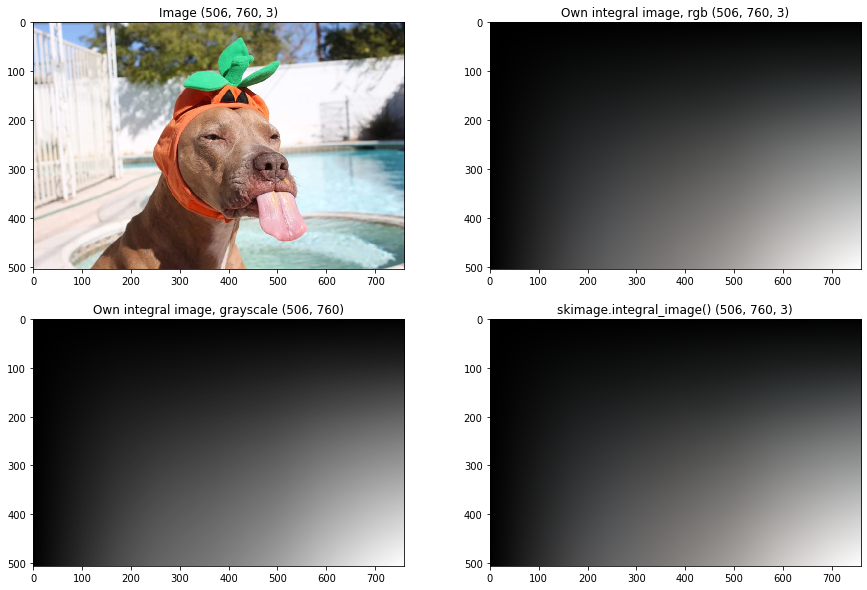

In [7]:
def show_ii(img):
    fig  = plt.figure(figsize=(15, 10))
    ax11 = plt.subplot(2, 2, 1)
    ax12 = plt.subplot(2, 2, 2)
    ax13 = plt.subplot(2, 2, 3)
    ax14 = plt.subplot(2, 2, 4)
    
    ii_rgb = ii_to_img(
        get_ii(img, grayscale=False)
    )
    ii_gs = ii_to_img(
        get_ii(img, grayscale=True)
    )
    ii_sk = ii_to_img(
        skimage.transform.integral_image(img)
    )
    
    ax11.set_title(f'Image {img.shape}')
    ax12.set_title(f'Own integral image, rgb {ii_rgb.shape}')
    ax13.set_title(f'Own integral image, grayscale {ii_gs.shape}')
    ax14.set_title(f'skimage.integral_image() {ii_sk.shape}')
    
    ax11.imshow(img)
    
    ax12.imshow(ii_rgb)
    
    ax13.imshow(ii_gs, cmap='gray')
    
    ax14.imshow(ii_sk)
    
show_ii(dog)

# Ex. 5.3 AdaBoosting
Implement the AdaBoost algorithm as outlined in the paper. Train a 20-feature classifier using these datasets: 
    
faces:    https://qmul-tinyface.github.io/
nonfaces: https://www.cs.toronto.edu/~kriz/cifar.html

Test your classifier with different thesholds and visualize the ROC curve **(RESULTS)**

## Load dataset

In [8]:
! ls ./datasets/tinyface

Face_Identification_Evaluation	readme.txt  Testing_Set  Training_Set


In [9]:
! ls ./datasets/cifar-100-python/test

./datasets/cifar-100-python/test


# A note on performance & used training data

This homework is probably supposed to be more like a proof of concept.
We are using only 1000 positive and 4000 negative samples to compute everything more quckly without
going through the effort of implementing everything on multiple threads. Naturally, training is much more computationally expensive than testing, so we should be ok to let this run for a loooong time. Thing is, I need my laptop for other purposes too.

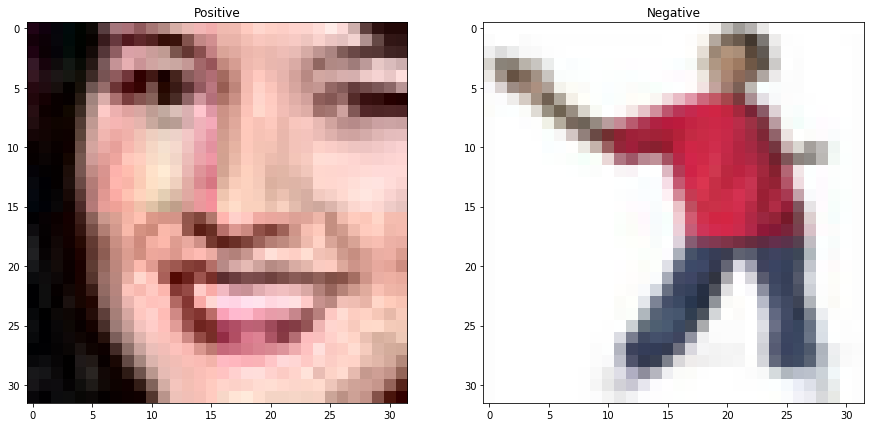

In [10]:
import pickle
import os
from tqdm import tqdm_notebook as tqdm

def load_faces(n_train=1000, n_test=8000):
    X_train, X_test = [], []
    
    train_dir = './datasets/tinyface/Training_Set/'
    test_dir  = './datasets/tinyface/Testing_Set/'
    
    print('loading training faces...')
    for d in tqdm(os.listdir(train_dir)):
        if not os.path.isdir(train_dir + d):
            continue
            
        for f in os.listdir(train_dir + d):
            if len(X_train) >= n_train:
                break
                
            # NOTE: for training, we need images of equal size for quicker training
            #       inclue only 32x32
            img = skimage.io.imread(train_dir + d + '/' + f)
            if img.shape[:2] == (32, 32):
                X_train.append(img)
            
    print('loading test faces...')
    for d in tqdm(os.listdir(test_dir)):
        if not os.path.isdir(test_dir + d):
            continue
            
        for f in os.listdir(test_dir + d):
            if len(X_test) >= n_test:
                break
                
            img = skimage.io.imread(test_dir + d + '/' + f)
            X_test.append(img)
    
    
    return X_train, X_test

def load_non_faces(n_train=4000, n_test=2000):
    
    train = './datasets/cifar-100-python/train'
    test = './datasets/cifar-100-python/test'
    
    with open(train, 'rb') as f:
        train_data = pickle.load(f, encoding='bytes')[b'data']
        X_train = train_data.reshape(train_data.shape[0], 3, 32, 32).transpose(0, 2, 3, 1)
        
    with open(test, 'rb') as f:
        test_data = pickle.load(f, encoding='bytes')[b'data']
        X_test = test_data.reshape(test_data.shape[0], 3, 32, 32).transpose(0, 2, 3, 1)
    
    return X_train[:n_train], X_test[:n_test]


def load_data(dataset_file='./datasets/viola_dataset.pickle'):
    if os.path.isfile(dataset_file):
        with open(dataset_file, 'rb') as f:
            return pickle.load(f)
    
    X_train, X_test, y_train, y_test = [], [], [], []
    
    # just concat positive and negative examples
    # for this method, it doesn't matter if positives are before negatives
    # we are not doing any minibatch training
    
    X_train_pos, X_test_pos = load_faces()
    X_train.extend(X_train_pos)
    X_test.extend(X_test_pos)
    y_train.extend(np.ones(len(X_train_pos) , dtype=int))
    y_test.extend(np.ones(len(X_test_pos), dtype=int))
    
    X_train_neg, X_test_neg = load_non_faces()
    X_train.extend(X_train_neg)
    X_test.extend(X_test_neg)
    y_train.extend(np.zeros(len(X_train_neg) , dtype=int))
    y_test.extend(np.zeros(len(X_test_neg), dtype=int))
    
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    
    # images may be of various sizes and numpy arrays cannot be constructed
    # for both datasets. However, for train, we made sure all are 32x32
    X_train = np.array(X_train)
    
    # save for next time
    with open(dataset_file, 'wb') as f:
        # Pickle the 'data' dictionary using the highest protocol available.
        pickle.dump([X_train, X_test, y_train, y_test], f, pickle.HIGHEST_PROTOCOL)
    
    return X_train, X_test, y_train, y_test

def show_data():
    fig = plt.figure(figsize=(15, 10))
    ax11 = plt.subplot(1, 2, 1)
    ax12 = plt.subplot(1, 2, 2)
    
    ax11.set_title("Positive")
    ax11.imshow(X_train[0])
    
    ax12.set_title("Negative")
    ax12.imshow(X_train[-1])
    
    
X_train, X_test, y_train, y_test = load_data()
show_data()

In [11]:
X_train.shape, len(X_test), y_train.shape, y_test.shape

((5000, 32, 32, 3), 10000, (5000,), (10000,))

## Compute features given an integral image

In [12]:
def compute_feature(ii, feature):
    """
    Computes a feature over a given integral image
    """
    # allow method to work on a numpy array of iis
    if not isinstance(ii, np.ndarray) or len(ii.shape) == 1:
        # we were given a jagged array, images of various sizes
        # situation is complicated, for now just compute feature for every single feature
        res = []
        for img in ii:
            res.append(compute_feature(img, feature)[0])
        return np.array(res)
    elif len(ii.shape) == 2:
        # single image was given
        ii = np.array([ii])
    
    y, x, h, w, vertical, rect3 = feature
    
    # resize feature to fit image
    img_h, img_w = ii.shape[1:]
    scale_h = img_h / 24
    scale_w = img_w / 24
    
    y = int(scale_h * y)
    h = int(scale_h * h)
    x = int(scale_w * x)
    w = int(scale_w * w)
    
    res = None
    
    if vertical:
        if rect3:
            # 1 2 3 4
            # | | | |
            # | | | |
            # | | | |
            # 5 6 7 8
            
            c = w // 3
            b1 = ii[:, y, x      ]
            b2 = ii[:, y, x + c  ]
            b3 = ii[:, y, x + 2*c]
            b4 = ii[:, y, x + w  ]
            
            b5 = ii[:, y + h, x      ]
            b6 = ii[:, y + h, x + c  ]
            b7 = ii[:, y + h, x + 2*c]
            b8 = ii[:, y + h, x + w  ]
            
            whole = b8 - (b4+b5) + b1
            center = b7 - (b3+b6) + b2
            
            res = 2*center - whole
        else:
            # 1 2 3
            # | | |
            # | | |
            # | | |
            # 4 5 6
            
            c = w // 2
            b1 = ii[:, y, x    ]
            b2 = ii[:, y, x + c]
            b3 = ii[:, y, x + w]
            
            b4 = ii[:, y + h, x    ]
            b5 = ii[:, y + h, x + c]
            b6 = ii[:, y + h, x + w]
            
            # whole = b6 - (b4 + b3) + b1
            # neg = b5 - (b2 + b4) + b1
            # res = whole - 2*neg
            #     = b6 - (b4 + b3) + b1 - 2b5 + 2b2 + 2b4 - 2b1
            #     = -b1 + 2b2 -b3 +b4 -2b5 + b6
            #     = 2*(b2 -b5) + ...
            
            res = 2*(b2 - b5) -b1 -b3 + b4 + b6
    else:
        if rect3:
            # analogically to vertical rec3
            c = h // 3
            b1 = ii[:, y      , x]
            b2 = ii[:, y + c  , x]
            b3 = ii[:, y + 2*c, x]
            b4 = ii[:, y + h  , x]
            
            b5 = ii[:, y      , x + w]
            b6 = ii[:, y + c  , x + w]
            b7 = ii[:, y + 2*c, x + w]
            b8 = ii[:, y + h  , x + w]
            
            whole = b8 - (b4+b5) + b1
            center = b7 - (b3+b6) + b2
            
            res = 2*center - whole
            
        else:
            # analogically to vertical rec2
            c = h // 2
            b1 = ii[:, y    , x]
            b2 = ii[:, y + c, x]
            b3 = ii[:, y + h, x]
            
            b4 = ii[:, y    , x + w]
            b5 = ii[:, y + c, x + w]
            b6 = ii[:, y + h, x + w]
            
            res = -b1 + 2*b2 -b3 + b4 -2*b5 + b6
            
            
    # rescale result depending on image size
    # for feature placement and size, we scaled
    # so that larger images use larger features
    # Here, we need the reverse scaling, as larger
    # images compute difference over more pixels,
    # so they need to be scaled down accordingly to 
    # look similar to features on 24x24
    return (1 / (scale_h * scale_w)) * res
        
compute_feature(np.array([get_ii(X_train[0]), get_ii(X_train[1])]), (17, 4, 6, 14, False, True))

array([-30.00351728, -29.13225904])

## Implement weak classifiers

In [13]:
class WeakClassifier:
    def __init__(self, feature):
        self.feature = feature
        self.threshold = 0
        self.sign = 1
        self.scores_data = None
        
    def train(self, Xii, y, w):
        if self.scores_data is None:
            scores = compute_feature(Xii, self.feature)

            # compute threshold
            # it makes sense to only try the computed scores as thresholds
            # sort scores so we can use approach from lecture
            # it also makes sense to traverse only unique scores
            sortarg = np.argsort(scores)
            scores = scores[sortarg]
            unique_scores, unique_indices = np.unique(scores, return_index=True)
        else:
            sortarg, scores, unique_scores, unique_indices = self.scores_data
            
        y = y[sortarg]
        w = w[sortarg]
        
        # Denote:
        # Sp  -- sum of weights of positive samples in left partition
        # Sn  --       --||--      negative            --||--
        # Tp  -- total sum of weights of positive examples
        # Tn  --       --||--            negative  --||--
        # T   -- total sum of weights (1, as we use normalized weights)
        
        Sp = 0
        Sn = 0
        # compute below more efficiently
        # T  = sum(w)
        # Tp = sum(w[np.where(y == 1)])
        # Tn = T - Tp
        
        # error per threshold and threshold sign
        # E[i, 0] denotes sign -1, E[i, 1] denotes sign +1
        E = np.full((len(scores), 2), np.inf)
        
        # compute errors
        # we are using cummulative sums to compute Sp and Sn
        # as this is the innermost loop of the training, we want this highly optimized
        wp_cumsum = np.cumsum(y * w)
        wn_cumsum = np.cumsum((1- y) * w)
        Tp = wp_cumsum[-1]
        
        # compute the error as in lecture usig cummulative sum up to each unique index
        # and numpy operations for efficiency
        Sp = wp_cumsum[unique_indices]
        Sn = wn_cumsum[unique_indices]
        E[unique_indices, 0] = Sn + Tp - Sp
        E[unique_indices, 1] = 1 - E[unique_indices, 0]
            
        # find and set best threshold + sign combo
        score_argmin, sign_argmin = np.unravel_index(np.argmin(E, axis=None), E.shape)
        self.sign = 1 if sign_argmin == 1 else -1
        self.threshold = scores[score_argmin]
        
        # save scores to save time when data weights are adjusted
        self.scores_data = sortarg, scores, unique_scores, unique_indices
        
        
        # return the error of the classifier
        return E[score_argmin, sign_argmin]
        
    def predict(self, Xii):
        return np.array(compute_feature(Xii, self.feature) * self.sign >= self.threshold * self.sign, dtype=int)
            

In [14]:
X_trainii = np.array([get_ii(x) for x in np.array(X_train)])

In [15]:
%%time
def test_weak_classifier():
    rand_i = np.random.choice(len(X_train), 100)
    

    c = WeakClassifier((11, 4, 6, 14, False, False))
    e = c.train(X_trainii, np.array(y_train), np.ones(len(y_train)) / len(y_train))
    
    print(f'classifier error: {e}')
    print(f'prediction of face: {c.predict(get_ii(face))}')
    print(f'learned threshold: {c.threshold}')
    print(f'learned threshold sign: {c.sign}')
    
test_weak_classifier()

classifier error: 0.20000000000005547
prediction of face: [0]
learned threshold: 21.46078235294115
learned threshold sign: 1
CPU times: user 3.22 ms, sys: 0 ns, total: 3.22 ms
Wall time: 2.53 ms


## Implement AdaBoost

In [16]:
class AdaBoost:
    def __init__(self, features):
        self.features = features
        # weights for data
        self.wd = []
        self.classifiers = []
        # weights for classifiers
        self.wc = []
        self.wc_sum = 0
    
    def train(self, X, y, k=20):
        n_pos = np.count_nonzero(y)
        n_neg = len(y) - n_pos
        
        # construct classifiers
        weak_classifiers = []
        for f in self.features:
            weak_classifiers.append(WeakClassifier(f))
    
        # initialize weights
        self.wd = np.full(len(y), 1 / (2 * n_neg))
        self.wd[y == 1] = 1 / (2 * n_pos)
        self.wc = np.zeros(k)
        
        # compute integral image
        Xii = np.array([get_ii(x) for x in X])
        
        # find best k classifiers
        print(f'Choosing the finest {k} classifiers...')
        for i in tqdm(range(k)):
            # normalize weights
            self.wd /= np.sum(self.wd)
            
            e = np.zeros(len(weak_classifiers))
            print(f'Choosing {i+1}. classifier...')
            for j, c in tqdm(enumerate(weak_classifiers), total=len(weak_classifiers)):
                e[j] = c.train(Xii, y, self.wd)
                
            argmin_e = np.argmin(e)
            ct = weak_classifiers[argmin_e]
            et = e[argmin_e]
            bt = et / (1 - et)
            
            print(f'Weighted error of {i+1}. classifier: {et}')
            
            # chosen classifier cannot be chosen again
            weak_classifiers.remove(ct)
            
            # add classifier to ensemble
            self.classifiers.append(ct)
            
            # error of chose classifier for each data point
            E = np.array(ct.predict(Xii) != y, dtype=int)
            # update data weights
            self.wd = self.wd * (bt**(1 - E))
            self.wc[i] = np.log(1 / (bt + 1e-5))
            self.wc_sum += self.wc[i]
    
    def predict(self, X, threshold_translation=0):
        Xii = [get_ii(x) for x in X]
        scores = np.zeros(len(X))
        for i, c in enumerate(self.classifiers):
            scores += c.predict(Xii) * self.wc[i]
            
        return np.array(scores >= 1/2 * self.wc_sum + threshold_translation, dtype=int), scores
    
    def test(self, X, y, threshold_translation=0):
        prediction, _ = self.predict(X, threshold_translation=threshold_translation)
        
        acc = np.mean(prediction == y)
        false_pos = np.mean(prediction - y == 1)
        
        return acc, false_pos

In [17]:
%%time
c = AdaBoost(features)
c.train(X_train, y_train, k=20)
c.test(X_train, y_train)

Choosing the finest 20 classifiers...


Choosing 1. classifier...



Weighted error of 1. classifier: 0.2240000000000234
Choosing 2. classifier...



Weighted error of 2. classifier: 0.3479352461915902
Choosing 3. classifier...



Weighted error of 3. classifier: 0.35234551659587954
Choosing 4. classifier...



Weighted error of 4. classifier: 0.33118132908618314
Choosing 5. classifier...



Weighted error of 5. classifier: 0.37702517153076387
Choosing 6. classifier...



Weighted error of 6. classifier: 0.355347619187776
Choosing 7. classifier...



Weighted error of 7. classifier: 0.37316354560366627
Choosing 8. classifier...



Weighted error of 8. classifier: 0.3830375536466154
Choosing 9. classifier...



Weighted error of 9. classifier: 0.39694908444365534
Choosing 10. classifier...



Weighted error of 10. classifier: 0.3915230243149941
Choosing 11. classifier...



Weighted error of 11. classifier: 0.35907335199322943
Choosing 12. classifier...



Weighted error of 12. classifier: 0.4024623115074613
Choosing 13. classifier...



Weighted error of 13. classifier: 0.3778938289048719
Choosing 14. classifier...



Weighted error of 14. classifier: 0.38673579101103106
Choosing 15. classifier...



Weighted error of 15. classifier: 0.3990960008646139
Choosing 16. classifier...



Weighted error of 16. classifier: 0.3898447404581391
Choosing 17. classifier...



Weighted error of 17. classifier: 0.42269670283973637
Choosing 18. classifier...



Weighted error of 18. classifier: 0.4009921793204496
Choosing 19. classifier...



Weighted error of 19. classifier: 0.38484648867968957
Choosing 20. classifier...



Weighted error of 20. classifier: 0.4127022635134983

CPU times: user 3min 31s, sys: 3.49 s, total: 3min 35s
Wall time: 3min 34s


(0.8844, 0.0962)

In [18]:
%%time
c.test(X_test, y_test)

CPU times: user 2.59 s, sys: 3.44 ms, total: 2.6 s
Wall time: 2.62 s


(0.7009, 0.0272)

## ROC curve

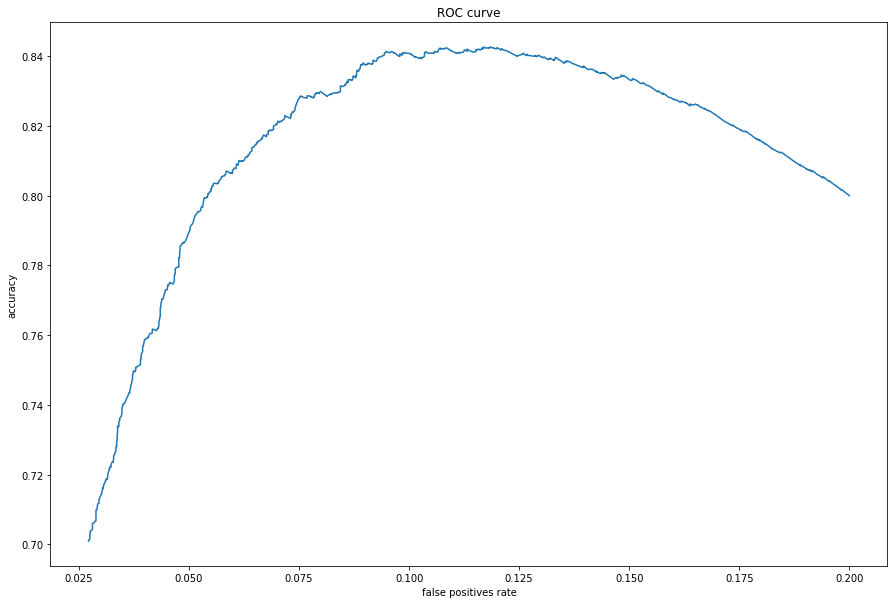

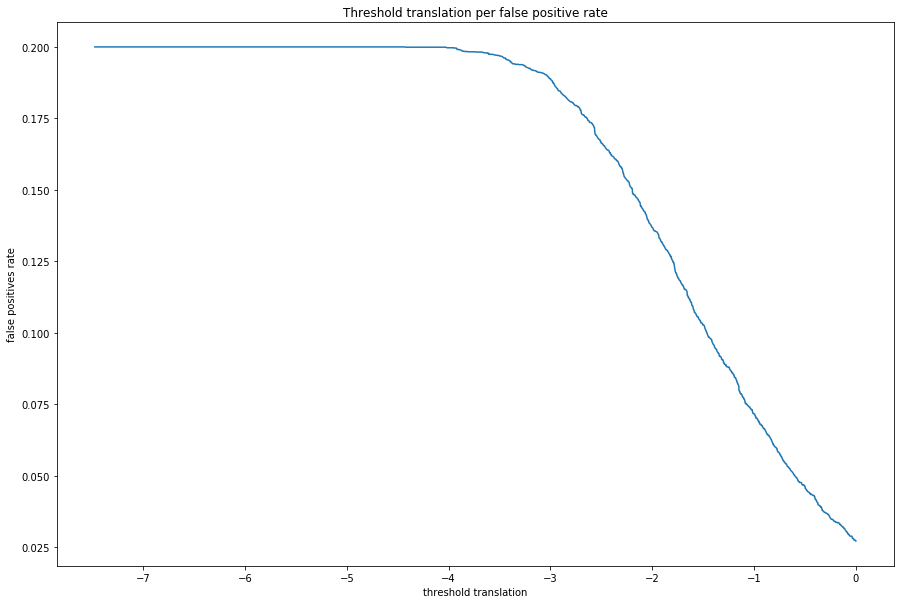

In [19]:
def display_roc_curve():
    predictions, scores = c.predict(X_test)
    fn_idx = np.where(y_test - predictions == 1)
    fn_scores = scores[fn_idx]
    
    acc = [np.mean(predictions == y_test)]
    fp  = [np.mean(predictions - y_test == 1)]
    threshold_translations = [0]
    
    # start with slower changes, i.e. higher scores
    scores_fn_sorted = np.sort(np.unique(fn_scores))[::-1]
    for s in tqdm(scores_fn_sorted):   
        # calculate translation s.t. current score example is trated as positive
        # i.e. convert this example from false negative to true positive
        threshold_translation = 2*s - c.wc_sum
        
        # calculate new prediction
        # we don't need to use the predict method again, given the scores and weights of the
        # classifier, we can simulate a prediction
        new_prediction = np.array(scores >= 1/2 * c.wc_sum + threshold_translation, dtype=int)
        
        # calculate new false positives rate and accuracy
        new_fp = np.mean(new_prediction - y_test == 1)
        new_acc = np.mean(new_prediction == y_test)
        
        acc.append(new_acc)
        fp.append(new_fp)
        threshold_translations.append(threshold_translation)
    
    # plot
    plt.figure(figsize=(15, 10))
    plt.plot(fp, acc)
    plt.xlabel('false positives rate')
    plt.ylabel('accuracy')
    plt.title('ROC curve')
    
    plt.figure(figsize=(15, 10))
    plt.plot(threshold_translations, fp)
    plt.xlabel('threshold translation')
    plt.ylabel('false positives rate')
    plt.title('Threshold translation per false positive rate')
    
    plt.show()
#     print(f'Threshold translations: {threshold_translations}')
        
display_roc_curve()    

## So, with a little tweaking of the threshold, we get:

In [20]:
c.test(X_test, y_test, threshold_translation=-1.8)

(0.8402, 0.1251)

In [21]:
c.test(X_test, y_test, threshold_translation=-1)

(0.8225, 0.0717)

In [22]:
c.test(X_train, y_train, threshold_translation=-1.8)

(0.505, 0.4946)

In [23]:
c.test(X_train, y_train, threshold_translation=-1)

(0.7192, 0.2774)